<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-11 19:01:01.238681


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

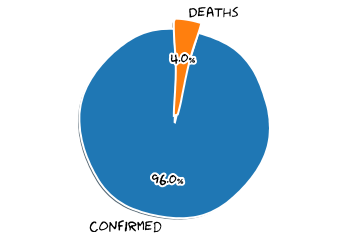

Alabama State Total Population
4887871
Alabama State Confirmed
10029 (0.20518135605460947% of population)
Alabama State Deaths
404 (4.028317878153356% of confirmed)



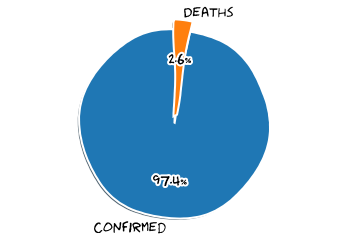

Alaska State Total Population
737438
Alaska State Confirmed
379 (0.05139415110151633% of population)
Alaska State Deaths
10 (2.638522427440633% of confirmed)



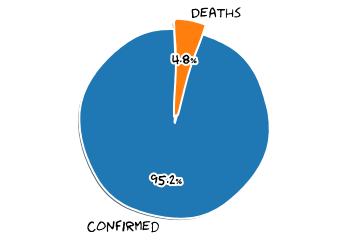

Arizona State Total Population
7171646
Arizona State Confirmed
11383 (0.15872227937631056% of population)
Arizona State Deaths
541 (4.752701396819819% of confirmed)



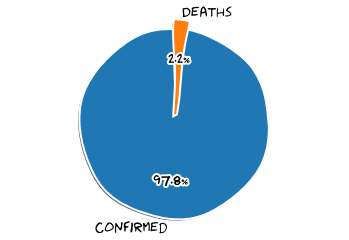

Arkansas State Total Population
3013825
Arkansas State Confirmed
3940 (0.13073088185279502% of population)
Arkansas State Deaths
87 (2.2081218274111674% of confirmed)



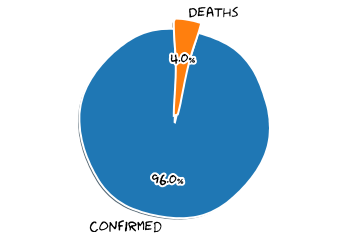

California State Total Population
39557045
California State Confirmed
67987 (0.17187077548386134% of population)
California State Deaths
2719 (3.9992939826731586% of confirmed)



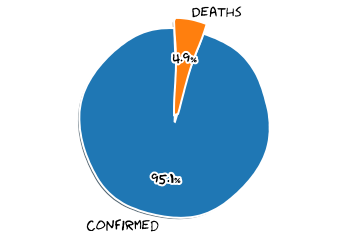

Colorado State Total Population
5695564
Colorado State Confirmed
19703 (0.3459358897556063% of population)
Colorado State Deaths
969 (4.918032786885246% of confirmed)



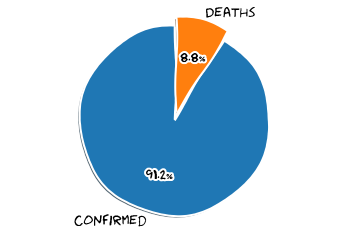

Connecticut State Total Population
3572665
Connecticut State Confirmed
33554 (0.9391868535113144% of population)
Connecticut State Deaths
2967 (8.842462895630923% of confirmed)



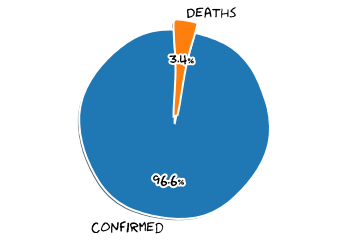

Delaware State Total Population
967171
Delaware State Confirmed
6565 (0.6787837931451626% of population)
Delaware State Deaths
225 (3.427265803503427% of confirmed)



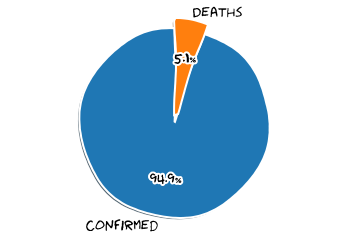

District of Columbia State Total Population
702455
District of Columbia State Confirmed
6389 (0.9095244535237132% of population)
District of Columbia State Deaths
328 (5.1338237595867895% of confirmed)



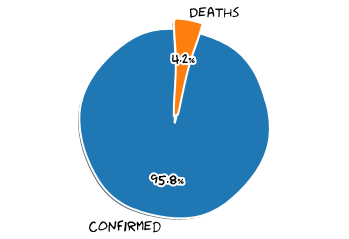

Florida State Total Population
21299325
Florida State Confirmed
40982 (0.19240985336389768% of population)
Florida State Deaths
1735 (4.233565955785467% of confirmed)



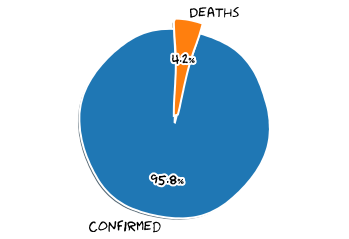

Georgia State Total Population
10519475
Georgia State Confirmed
33933 (0.32257313221429773% of population)
Georgia State Deaths
1441 (4.246603601214157% of confirmed)



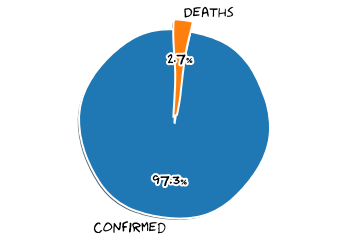

Hawaii State Total Population
1420491
Hawaii State Confirmed
632 (0.04449165816608482% of population)
Hawaii State Deaths
17 (2.689873417721519% of confirmed)



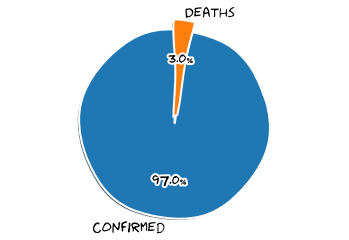

Idaho State Total Population
1754208
Idaho State Confirmed
2230 (0.12712289534650395% of population)
Idaho State Deaths
67 (3.004484304932735% of confirmed)



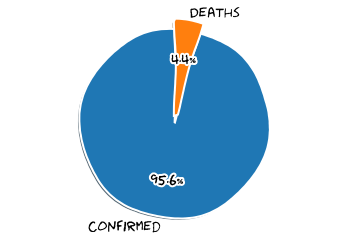

Illinois State Total Population
12741080
Illinois State Confirmed
77741 (0.6101602061991604% of population)
Illinois State Deaths
3406 (4.381214545735198% of confirmed)



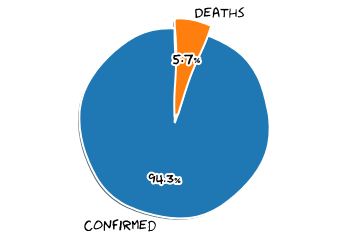

Indiana State Total Population
6691878
Indiana State Confirmed
24627 (0.3680132841632797% of population)
Indiana State Deaths
1411 (5.729483899784789% of confirmed)



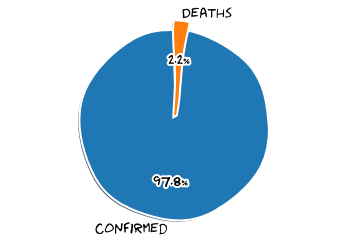

Iowa State Total Population
3156145
Iowa State Confirmed
12373 (0.392028883337109% of population)
Iowa State Deaths
271 (2.1902529701769984% of confirmed)



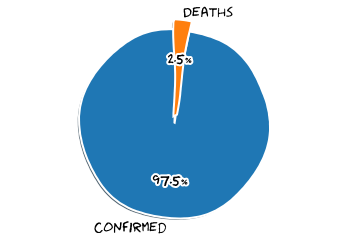

Kansas State Total Population
2911510
Kansas State Confirmed
6965 (0.2392229461688265% of population)
Kansas State Deaths
175 (2.512562814070352% of confirmed)



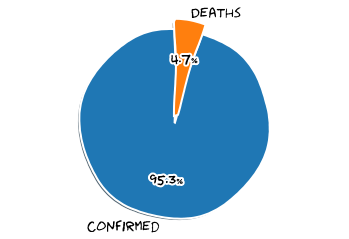

Kentucky State Total Population
4468402
Kentucky State Confirmed
6440 (0.14412311157322014% of population)
Kentucky State Deaths
304 (4.720496894409938% of confirmed)



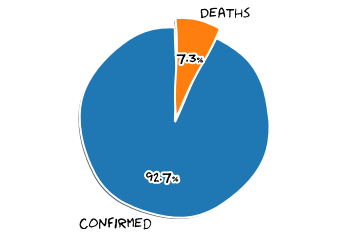

Louisiana State Total Population
4659978
Louisiana State Confirmed
31817 (0.6827714637279403% of population)
Louisiana State Deaths
2316 (7.279127510450388% of confirmed)



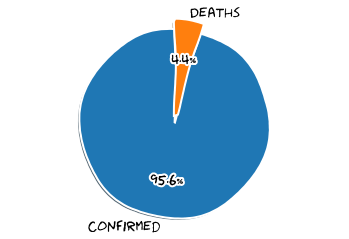

Maine State Total Population
1338404
Maine State Confirmed
1462 (0.1092345808888796% of population)
Maine State Deaths
65 (4.4459644322845415% of confirmed)



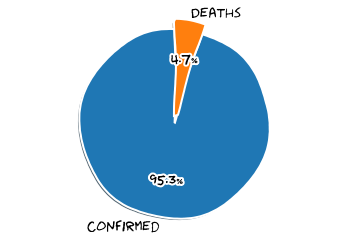

Maryland State Total Population
6042718
Maryland State Confirmed
33373 (0.5522845845197476% of population)
Maryland State Deaths
1577 (4.725376801606089% of confirmed)



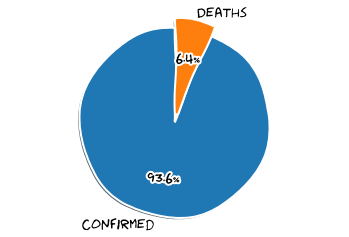

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
77793 (1.1270837531904918% of population)
Massachusetts State Deaths
4979 (6.40031879475017% of confirmed)



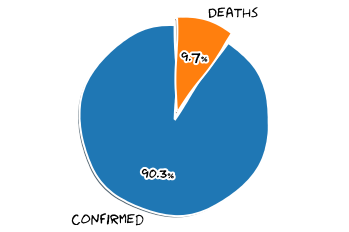

Michigan State Total Population
9995915
Michigan State Confirmed
47182 (0.4720128172358408% of population)
Michigan State Deaths
4555 (9.654105379170023% of confirmed)



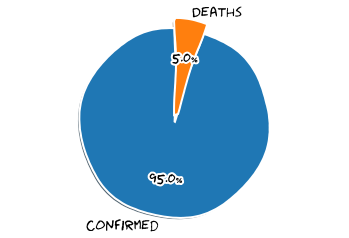

Minnesota State Total Population
5611179
Minnesota State Confirmed
11799 (0.21027666378135504% of population)
Minnesota State Deaths
591 (5.008899059242309% of confirmed)



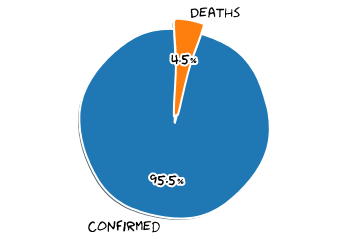

Mississippi State Total Population
2986530
Mississippi State Confirmed
9674 (0.3239210722812093% of population)
Mississippi State Deaths
435 (4.496588794707463% of confirmed)



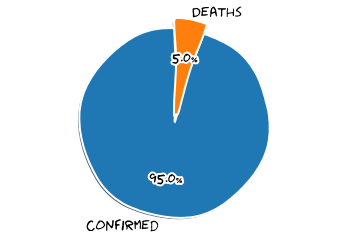

Missouri State Total Population
6126452
Missouri State Confirmed
10104 (0.16492416818086553% of population)
Missouri State Deaths
504 (4.98812351543943% of confirmed)



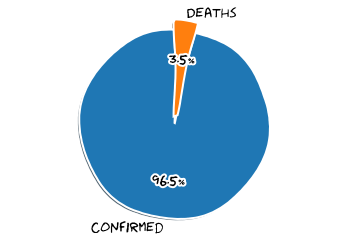

Montana State Total Population
1062305
Montana State Confirmed
459 (0.04320792992596288% of population)
Montana State Deaths
16 (3.485838779956427% of confirmed)



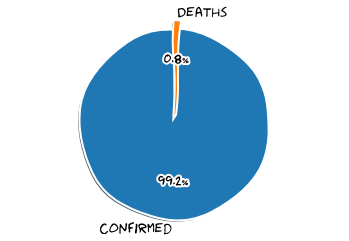

Nebraska State Total Population
1929268
Nebraska State Confirmed
8171 (0.42352850925843377% of population)
Nebraska State Deaths
69 (0.8444498837351609% of confirmed)



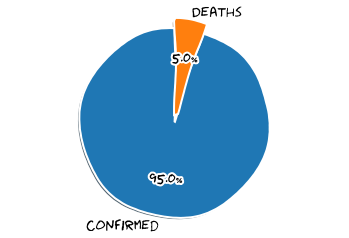

Nevada State Total Population
3034392
Nevada State Confirmed
6132 (0.20208331685556777% of population)
Nevada State Deaths
305 (4.973907371167645% of confirmed)



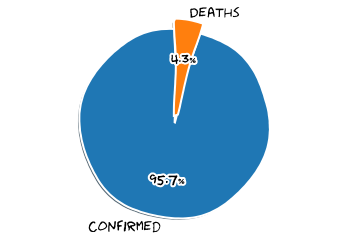

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
3071 (0.22639845833781805% of population)
New Hampshire State Deaths
133 (4.330836860957342% of confirmed)



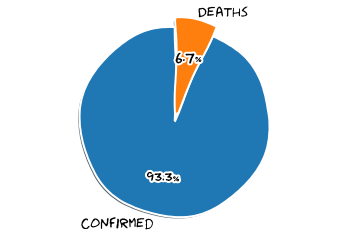

New Jersey State Total Population
8908520
New Jersey State Confirmed
138754 (1.5575426670198864% of population)
New Jersey State Deaths
9256 (6.670798679677703% of confirmed)



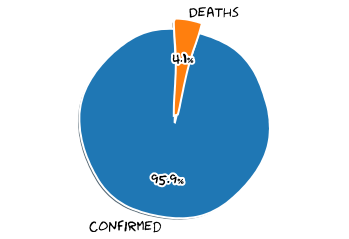

New Mexico State Total Population
2095428
New Mexico State Confirmed
4863 (0.23207669268521755% of population)
New Mexico State Deaths
200 (4.112687641373638% of confirmed)



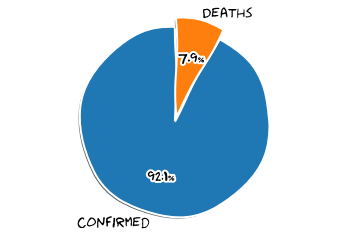

New York State Total Population
19542209
New York State Confirmed
337055 (1.724753839240999% of population)
New York State Deaths
26682 (7.916215454451055% of confirmed)



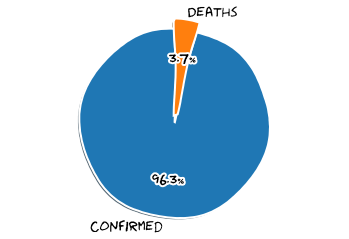

North Carolina State Total Population
10383620
North Carolina State Confirmed
15199 (0.1463747710336087% of population)
North Carolina State Deaths
568 (3.737087966313573% of confirmed)



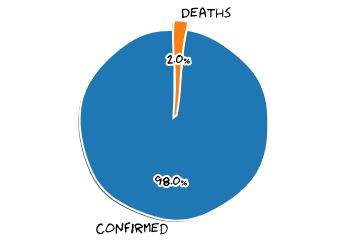

North Dakota State Total Population
760077
North Dakota State Confirmed
1518 (0.19971660765948715% of population)
North Dakota State Deaths
30 (1.9762845849802373% of confirmed)



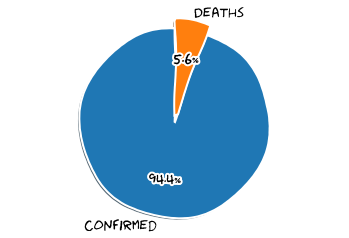

Ohio State Total Population
11689442
Ohio State Confirmed
24073 (0.2059379737715453% of population)
Ohio State Deaths
1341 (5.570556224816184% of confirmed)



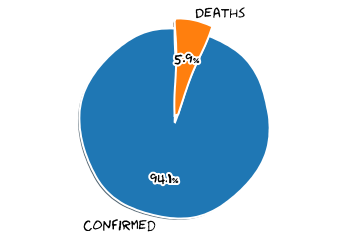

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
4616 (0.11706587669179339% of population)
Oklahoma State Deaths
273 (5.9142114384748705% of confirmed)



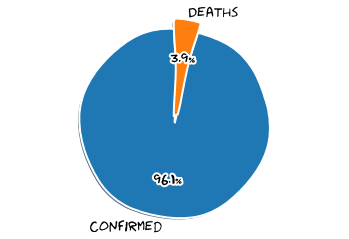

Oregon State Total Population
4190713
Oregon State Confirmed
3228 (0.0770274652547192% of population)
Oregon State Deaths
127 (3.9343246592317223% of confirmed)



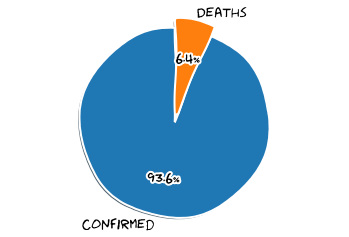

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
60357 (0.471279122608936% of population)
Pennsylvania State Deaths
3833 (6.350547575260533% of confirmed)



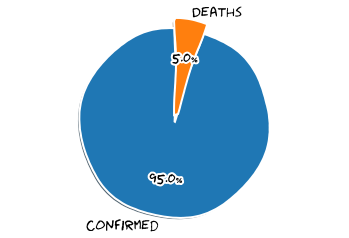

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
2256 (0.07060694746073193% of population)
Puerto Rico State Deaths
113 (5.00886524822695% of confirmed)



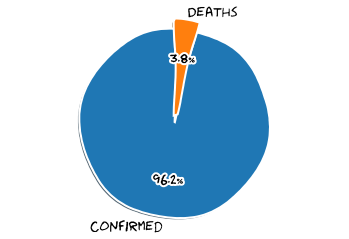

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
11450 (1.0829317658408326% of population)
Rhode Island State Deaths
430 (3.755458515283843% of confirmed)



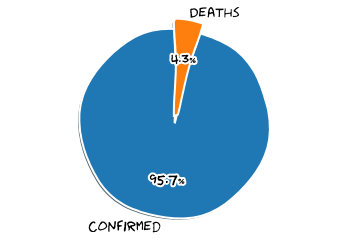

South Carolina State Total Population
5084127
South Carolina State Confirmed
7653 (0.15052731766928718% of population)
South Carolina State Deaths
331 (4.325101267476807% of confirmed)



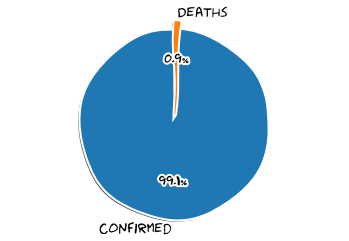

South Dakota State Total Population
882235
South Dakota State Confirmed
3614 (0.4096414220700834% of population)
South Dakota State Deaths
34 (0.9407858328721639% of confirmed)



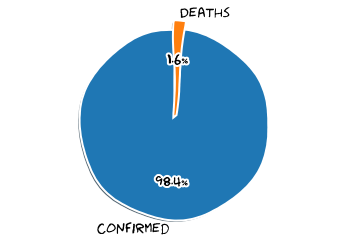

Tennessee State Total Population
6770010
Tennessee State Confirmed
14985 (0.22134383848768316% of population)
Tennessee State Deaths
243 (1.6216216216216217% of confirmed)



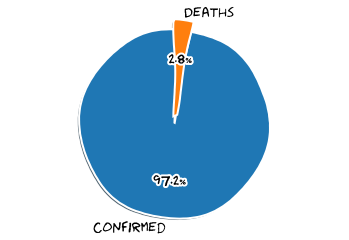

Texas State Total Population
28701845
Texas State Confirmed
39273 (0.13683092498060664% of population)
Texas State Deaths
1095 (2.7881750821174855% of confirmed)



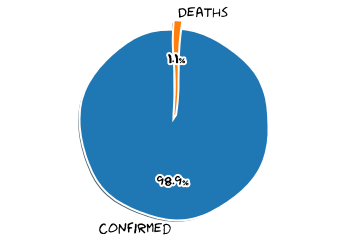

Utah State Total Population
3161105
Utah State Confirmed
6251 (0.19774730671711316% of population)
Utah State Deaths
67 (1.0718285074388096% of confirmed)



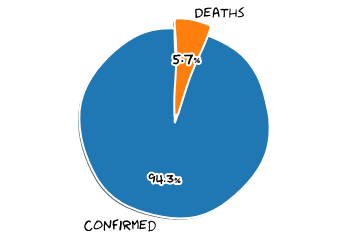

Vermont State Total Population
626299
Vermont State Confirmed
926 (0.14785270294220493% of population)
Vermont State Deaths
53 (5.723542116630669% of confirmed)



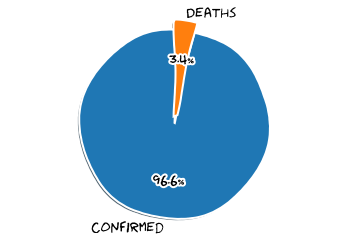

Virginia State Total Population
8517685
Virginia State Confirmed
25070 (0.29432879943317936% of population)
Virginia State Deaths
850 (3.390506581571599% of confirmed)



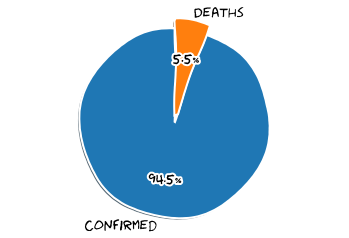

Washington State Total Population
7535591
Washington State Confirmed
16891 (0.22414963869456292% of population)
Washington State Deaths
931 (5.511811023622047% of confirmed)



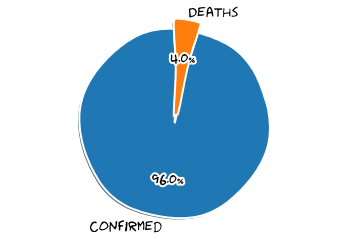

West Virginia State Total Population
1805832
West Virginia State Confirmed
1367 (0.07569917910414702% of population)
West Virginia State Deaths
54 (3.9502560351133873% of confirmed)



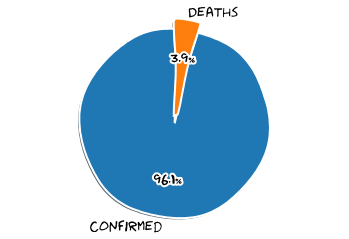

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
10219 (0.17577845481466803% of population)
Wisconsin State Deaths
400 (3.914277326548586% of confirmed)



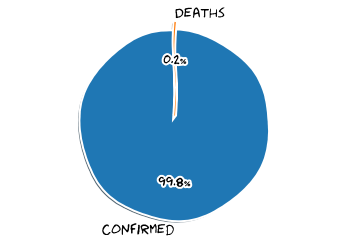

Wyoming State Total Population
577737
Wyoming State Confirmed
662 (0.1145850101343691% of population)
Wyoming State Deaths
1 (0.1510574018126888% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1337560
US Deaths
79548

New York City Confirmed
185357
New York City Deaths
19789

Philippines Confirmed
11086
Philippines Deaths
726



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 4152670},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 284536},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-11T18:32:31.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1432542},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-11 02:32:30,34.22333378,-82.46170658,34,0,0,34,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-11 02:32:30,30.2950649,-92.41419698,148,11,0,137,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-11 02:32:30,37.76707161,-75.63234615,508,7,0,501,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-11 02:32:30,43.4526575,-116.24155159999998,733,19,0,714,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-11 02:32:30,41.33075609,-94.47105874,3,0,0,3,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3229,,,,West Bank and Gaza,2020-05-11 02:32:30,31.9522,35.2332,375,2,263,110,West Bank and Gaza
3230,,,,Western Sahara,2020-05-11 02:32:30,24.2155,-12.8858,6,0,5,1,Western Sahara
3231,,,,Yemen,2020-05-11 02:32:30,15.552727,48.516388,51,8,1,42,Yemen
3232,,,,Zambia,2020-05-11 02:32:30,-13.133897,27.849332,267,7,117,143,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589218355000,40.767273,-73.971526,185357,0,19789,165568,New York City,36061,"New York City, New York, US",2223.354549,None,None,84036061,USA
1,Illinois,US,1589218355000,41.841448,-87.816588,52655,0,2317,50338,Cook,17031,"Cook, Illinois, US",1022.380929,None,None,84017031,USA
2,New York,US,1589218355000,40.740665,-73.589419,38337,0,1973,36364,Nassau,36059,"Nassau, New York, US",2825.287194,None,None,84036059,USA
3,New York,US,1589218355000,40.883201,-72.801217,36911,0,1639,35272,Suffolk,36103,"Suffolk, New York, US",2499.727415,None,None,84036103,USA
4,California,US,1589218355000,34.308284,-118.228241,31703,0,1531,30172,Los Angeles,06037,"Los Angeles, California, US",315.795020,None,None,84006037,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,Oklahoma,US,1589221951000,36.423163,-99.262830,1,0,0,1,Woodward,40153,"Woodward, Oklahoma, US",4.947801,None,None,84040153,USA
2903,Missouri,US,1589221951000,40.479456,-94.423288,1,0,0,1,Worth,29227,"Worth, Missouri, US",49.677099,None,None,84029227,USA
2904,West Virginia,US,1589221951000,37.612327,-81.545111,1,0,0,1,Wyoming,54109,"Wyoming, West Virginia, US",4.903403,None,None,84054109,USA
2905,Alaska,US,1589221951000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589218355000,40.767273,-73.971526,185357,0,19789,165568,New York City,36061,"New York City, New York, US",2223.354549,None,None,84036061,USA
2,New York,US,1589218355000,40.740665,-73.589419,38337,0,1973,36364,Nassau,36059,"Nassau, New York, US",2825.287194,None,None,84036059,USA
3,New York,US,1589218355000,40.883201,-72.801217,36911,0,1639,35272,Suffolk,36103,"Suffolk, New York, US",2499.727415,None,None,84036103,USA
5,New York,US,1589218355000,41.162784,-73.757417,31384,0,1227,30157,Westchester,36119,"Westchester, New York, US",3243.804173,None,None,84036119,USA
18,New York,US,1589218355000,41.150279,-74.025605,12484,0,562,11922,Rockland,36087,"Rockland, New York, US",3831.928027,None,None,84036087,USA
21,New York,US,1589218355000,41.403375,-74.302408,9584,0,367,9217,Orange,36071,"Orange, New York, US",2489.738661,None,None,84036071,USA
55,New York,US,1589218355000,42.762490,-78.730637,4483,0,357,4126,Erie,36029,"Erie, New York, US",487.971072,None,None,84036029,USA
71,New York,US,1589218355000,41.764861,-73.743567,3378,0,98,3280,Dutchess,36027,"Dutchess, New York, US",1148.128259,None,None,84036027,USA
111,New York,US,1589218355000,43.146389,-77.693229,1850,0,147,1703,Monroe,36055,"Monroe, New York, US",249.403454,None,None,84036055,USA
138,New York,US,1589218355000,42.600603,-73.977239,1456,0,59,1397,Albany,36001,"Albany, New York, US",476.586385,None,None,84036001,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

337055

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589218355000,40.767273,-73.971526,185357,0,19789,165568,New York City,36061,"New York City, New York, US",2223.354549,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
57,None,Philippines,1589221951000,12.879721,121.774017,11086,1999,726,8361,None,None,Philippines,10.116709,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
